In [16]:
import pandas as pd

# Load the datasets
train_features = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\train_features.csv")
train_labels = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\train_labels.csv")
test_features = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\test_features.csv")
submission_format = pd.read_csv(r"D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\submission_format.csv")


In [2]:
# Checking for missing values in both training and test datasets
missing_train = train_features.isnull().sum()
missing_train


tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [14]:
missing_test = test_features.isnull().sum()
missing_test

ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64

In [15]:
duplicate_train = train_features.duplicated().sum()
duplicate_test = test_features.duplicated().sum()

duplicate_train,
#duplicate_test


(0,)

In [45]:
train_features.columns

Index(['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota'],
      dtype='object')

### **HANDLING MISSING VALUE**

In [17]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columns to be dropped
columns_to_drop = ['tanggal_menjadi_anggota']

# Categorical columns and numerical columns
categorical_columns = ['pendidikan', 'status_pernikahan']
numerical_columns = ['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 
                     'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 
                     'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan']

# Define imputers
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Define OneHotEncoder for categorical data
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

# Define scaler for numerical data
scaler = StandardScaler()

# Preprocessing pipeline for categorical data
categorical_pipeline = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('encoder', categorical_encoder)
])

# Preprocessing pipeline for numerical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', scaler)
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns),
        ('num', numerical_pipeline, numerical_columns)
    ])

# Fit preprocessor on train features and transform both train and test features
train_features_preprocessed = preprocessor.fit_transform(train_features.drop(columns=columns_to_drop))
test_features_preprocessed = preprocessor.transform(test_features.drop(columns=columns_to_drop))

# Check the shape of the processed data
train_features_preprocessed.shape, test_features_preprocessed.shape


((3817, 25), (3818, 25))

In [6]:
train_features_preprocessed = pd.DataFrame(train_features_preprocessed)

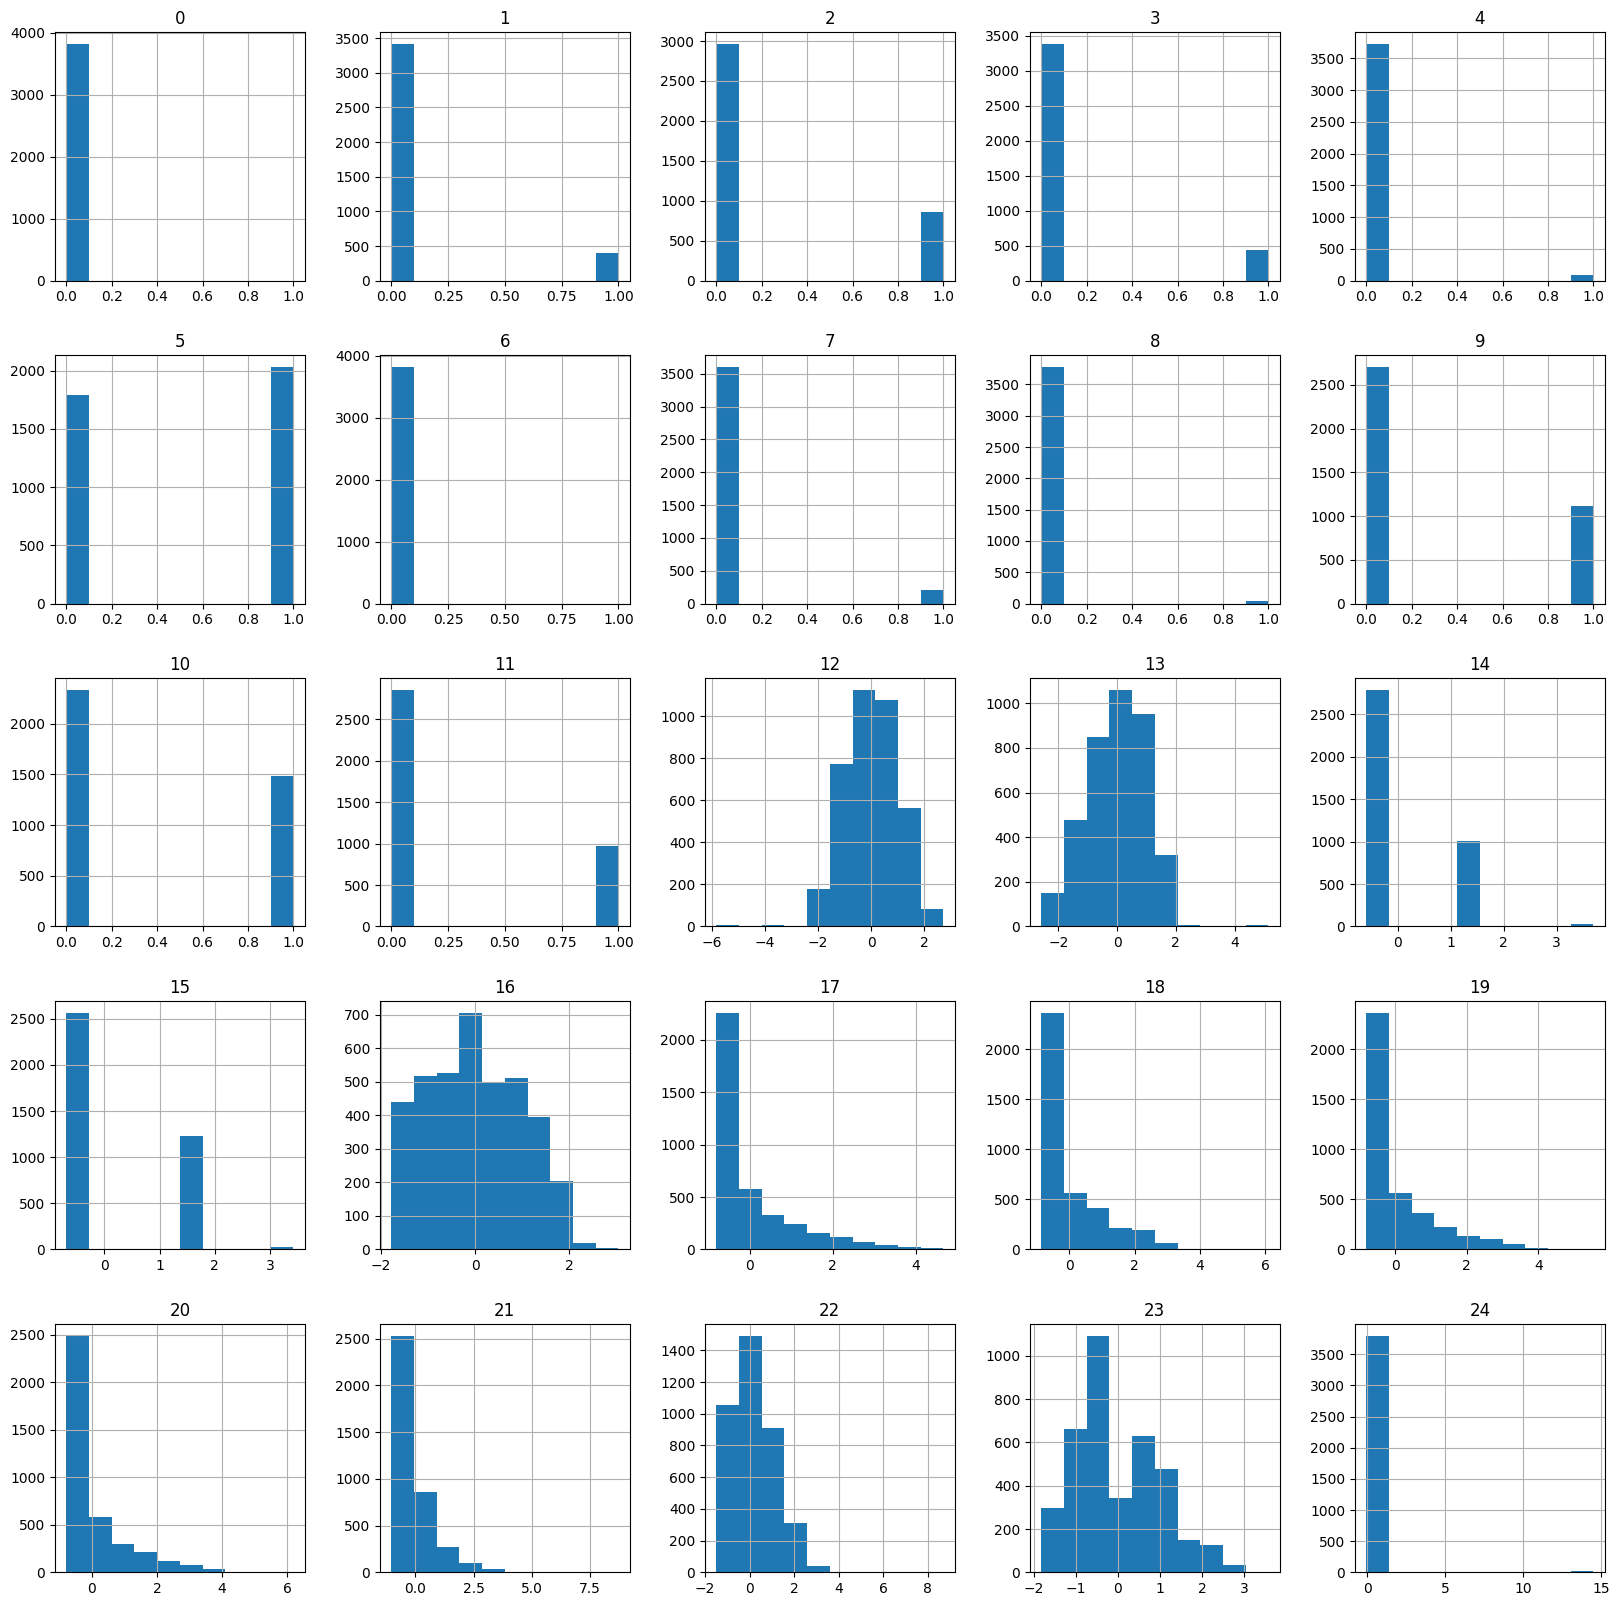

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
train_features_preprocessed.hist(figsize=(20,20))
plt.show()

### **Modelling**

In [13]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation to evaluate the model
scores = cross_val_score(rf_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_score = scores.mean()

average_score


0.7316657474914322

In [20]:
# XGBOOST
from xgboost import XGBClassifier
import numpy as np

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Cross-validation to evaluate the model
xgb_scores = cross_val_score(xgb_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_xgb_score = np.mean(xgb_scores)

average_xgb_score


0.7384676123253818

In [6]:
# SVM
from sklearn.svm import SVC
import numpy as np

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Cross-validation to evaluate the model
svm_scores = cross_val_score(svm_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_svm_score = np.mean(svm_scores)

average_svm_score


0.27017899796398553

In [6]:
# GRADIEN BOOSTING

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Cross-validation to evaluate the model
gb_scores = cross_val_score(gb_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_gb_score = np.mean(gb_scores)

average_gb_score


0.5902689475998668

In [5]:
# NEURAL NETWORK
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

# Initialize the MLP Classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)

# Cross-validation to evaluate the model
nn_scores = cross_val_score(nn_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_nn_score = np.mean(nn_scores)

average_nn_score


0.5297460195522833

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)

# Cross-validation to evaluate the model
logistic_scores = cross_val_score(logistic_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_logistic_score = np.mean(logistic_scores)

average_logistic_score


In [10]:
# KNN
# from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Cross-validation to evaluate the model
knn_scores = cross_val_score(knn_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_knn_score = np.mean(knn_scores)

average_knn_score


0.5724187033043248

In [9]:
# DDT

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Cross-validation to evaluate the model
dt_scores = cross_val_score(dt_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_dt_score = np.mean(dt_scores)

average_dt_score


0.5754391312000043

In [11]:
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Cross-validation to evaluate the model
nb_scores = cross_val_score(nb_classifier, train_features_preprocessed, train_labels.squeeze(), cv=60, scoring='f1_macro')

# Calculate average Macro F-Score across all folds
average_nb_score = np.mean(nb_scores)

average_nb_score


0.13368360568249688

In [24]:
# Fit the XGBoost model to the entire training data
xgb_classifier.fit(train_features_preprocessed, train_labels.squeeze(), )

# Predict on the test data
test_predictions = xgb_classifier.predict(test_features_preprocessed)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'ID': test_features['ID'],
    'jumlah_promosi': test_predictions
})

submission.head()


,ID,jumlah_promosi
0,2241,0
1,2274,0
2,1107,2
3,4478,0
4,5080,4


In [22]:
# Save the DataFrame to a CSV file
submission.to_csv(r'D:\Lomba-Lomba\Find IT UGM 2024\data-analytics-competition-find-it-2024\submission_predictions_5.csv', index=False)
